# Dataset Exploration
----------

## Introduction

In an ideal world, we will have all of the data we want with all of the desirable properties (no missing values, no errors, standard formats, and so on). 
However, that is hardly ever true - and we have to work with using our datasets to answer questions of interest as intelligently as possible. 

In this notebook, we will explore our datasets to answer some questions of interest. 

### Learning Objectives

This notebook will give you the opportunity to spend some hands-on time with the data. 

This notebook will take you around the different ways you can analyze your data. This involves looking at basic metrics in the larger dataset, taking a random sample, creating derived variables, making sense of the missing values, and so on. 

This will be done using both SQL and `pandas` in Python. The `sqlite3` Python package will give you the opportunity to interact with the database using SQL to pull data into Python. Some additional manipulations will be handled by Pandas in Python (by converting your datasets into dataframes).

This notebook will provide an introduction and examples for: 

- How to create new tables from the larger tables in database (sometimes called the "analytical frame")
- How to explore different variables of interest
- How to explore aggregate metrics
- How to handle missing values
- How to join newly created tables

### Methods

We will be using the `sqlite3` Python package to access tables in our database - SQLite3. 

To read the results of our queries, we will be using the `pandas` Python package, which has the ability to read tabular data from SQL queries into a pandas DataFrame object. Within `pandas`, we will use various commands to:

- Create statistical summaries
- Create subsets of the data

Within SQL, we will use various queries to:

- select data subsets
- Sum over groups
- create new tables
- Count distinct values of desired variables
- Order data by chosen variables

## Python Setup

In Python, we `import` packages. The `import` command allows us to use libraries created by others in our own work by "importing" them. You can think of importing a library as opening up a toolbox and pulling out a specific tool. Among the most famous Python packages:
- `numpy` is short for "numerical Python". `numpy` is a lynchpin in Python's scientific computing stack. Its strengths include a powerful *N*-dimensional array object, and a large suite of functions for doing numerical computing. 
- `pandas` is a library in Python for data analysis that uses the DataFrame object (modeled after R DataFrames, for those familiar with that language) which is similiar to a spreedsheet but allows you to do your analysis programaticaly rather than the point-and-click of Excel. It is a lynchpin of the PyData stack and is built on top of `numpy`.  
- `sqlite3` is a library that helps us connect to an sqlite3 database.

In [1]:
# pandas-related imports
import pandas as pd

# database interaction imports
import sqlite3

# Graphing
import matplotlib as mpl
import seaborn as sns
%matplotlib inline 

__When in doubt, use shift + tab to read the documentation of a method.__

__The `help()` function provides information on what you can do with a function.__

In [2]:
# for example
help(sqlite3.connect)

Help on built-in function connect in module _sqlite3:

connect(...)
    connect(database[, timeout, detect_types, isolation_level,
            check_same_thread, factory, cached_statements, uri])
    
    Opens a connection to the SQLite database file *database*. You can use
    ":memory:" to open a database connection to a database that resides in
    RAM instead of on disk.



## Load the Data

We can execute SQL queries using Python to get the best of both worlds. For example, Python - and pandas in particular - make it much easier to calculate descriptive statistics of the data. Additionally, as we will see in the Data Visualization exercises, it is relatively easy to create data visualizations using Python. 

Pandas provides many ways to load data. It allows the user to read the data from a local csv or excel file, pull the data from a relational database, or read directly from a URL (when you have internet access). Since we are working with an SQLite3 database, we will demonstrate how to use pandas to read data from a relational database. For examples to read data from a CSV file, refert to the pandas documentation [Getting Data In/Out](pandas.pydata.org/pandas-docs/stable/10min.html#getting-data-in-out).

The function to run a SQL query and pull the data into a pandas dataframe (more to come) is `pd.read_sql()`. Just like doing a SQL query from pgAdmin, this function will ask for some information about the database, and what query you would like to run. Let's walk through the example below.

### Establish a Connection to the Database

The first parameter is the connection to the database. To create a connection we will use the SQLAlchemy package and tell it which database we want to connect to, just like in pgAdmin. Additional details on creating a connection to the database are provided in the [Databases](02_1_Databases.ipynb) notebook.

__Parameter 1: Connection__

In [8]:
# to create a connection to the database, 
# we need to pass the name of the database 

DB = 'ncdoc.db'

conn = sqlite3.connect(DB)

### Formulate Data Query

Depending on what data we are interested in, we can use different queries to pull different data. In this example, we will pull all the content of the offenders data.

__Create a query as a `string` object in Python__

In [9]:
query = '''
SELECT *
FROM inmate
LIMIT 20;
'''

Note:

- the three quotation marks surrounding the query body is called multi-line string. It is quite handy for writing SQL queries because the new line character will be considered part of the string, instead of breaking the string

In [10]:
# Now that we have defined a variable `query`, we can call it in the code
print(query)


SELECT *
FROM inmate
LIMIT 20;



> Note that the `LIMIT` provides one simple way to get a "sample" of data; however, using `LIMIT` does **not provide a _random_** sample. You may get different samples of data than others using just the `LIMIT` clause, but it is just based on what is fastest for the database to return.

### Pull Data from the Database

Now that we have the two parameters (database connection and query), we can pass them to the `pd.read_sql()` function, and obtain the data.

In [11]:
# here we pass the query and the connection to the pd.read_sql() function and assign the variable `wage` 
# to the dataframe returned by the function
df = pd.read_sql(query, conn)

In [12]:
# Look at the data
df.head()

,INMATE_DOC_NUMBER,INMATE_LAST_NAME,INMATE_FIRST_NAME,INMATE_MIDDLE_INITIAL,INMATE_NAME_SUFFIX,INMATE_NAME_SOUNDEX_CODE,INMATE_GENDER_CODE,INMATE_RACE_CODE,INMATE_BIRTH_DATE,INMATE_ETHNIC_AFFILIATION,...,CURRENT_PENDING_REVIEWS_FLAG,ESCAPE_HISTORY_FLAG,PRIOR_INCARCERATIONS_FLAG,NEXT_PAROLE_REVIEW_TYPE_CODE,TIME_OF_LAST_MOVEMENT,POPULATION/MANAGEMENT_UNIT,INMATE_POSITIVELY_IDENTIFIED,PAROLE_AND_TERMINATE_STATUS,INMATE_LABEL_STATUS_CODE,PRIMARY_OFFENSE_QUALIFIER
0,0000004,AARON,DAVID,C,,,MALE,WHITE,1961-10-15,UNKNOWN,...,N,N,Y,,00:09:00,,YES,,,
1,0000006,AARON,GERALD,,,,MALE,WHITE,1951-07-17,UNKNOWN,...,N,N,Y,,00:11:00,,YES,,,
2,0000008,AARON,JAMES,M,,,MALE,WHITE,1963-12-29,UNKNOWN,...,N,N,Y,,23:59:00,,YES,,FILE JACKET LABEL PRINTED,PRINCIPAL
3,0000010,AARON,KENNETH,T,,,MALE,BLACK,1953-05-18,UNKNOWN,...,N,N,Y,,00:13:00,,YES,,,
4,0000014,AARON,MOYER,,,,MALE,WHITE,1921-08-26,UNKNOWN,...,N,N,Y,,00:12:00,,YES,,,


## Analysis: Using Python and SQL

__What are the characteristics of inmates/offenders in North Carolina?__

Before we go any further, let's take a look at some of the data that we're working with.

__North Carolina Department of Corrections Data__:
- `inmate`: Characteristics about each inmate.
- `offender`: Characteristics about each offender.
- `sentences`: Transactional-level data about sentences.

Note that each row in the both the `inmate` and `offender` tables represents one person. However, the same person can have multiple sentences. Information about each person is included in the `inmate` and `offender` tables, separate from the actual sentences, because we don't want to have to repeat the information about about each person multiple times, as would be the case if we had just one large table with all of the relevant information. 

Let's bring in a subset of the offender data to explore it.

In [12]:
query = '''
SELECT *
FROM offender
limit 100;
'''
offender = pd.read_sql(query, conn)

In [13]:
offender.head()

,OFFENDER_NC_DOC_ID_NUMBER,OFFENDER_BIRTH_DATE,OFFENDER_GENDER_CODE,OFFENDER_RACE_CODE,OFFENDER_HEIGHT_(IN_INCHES),OFFENDER_WEIGHT_(IN_LBS),OFFENDER_SKIN_COMPLEXION_CODE,OFFENDER_HAIR_COLOR_CODE,OFFENDER_EYE_COLOR_CODE,OFFENDER_BODY_BUILD_CODE,...,OFFENDER_ETHNIC_CODE,OFFENDER_PRIMARY_LANGUAGE_CODE,OFFENDER_SHIRT_SIZE,OFFENDER_PANTS_SIZE,OFFENDER_JACKET_SIZE,OFFENDER_SHOE_SIZE,OFFENDER_DRESS_SIZE,NEXT_PHOTO_YEAR,DATE_OF_LAST_UPDATE,TIME_OF_LAST_UPDATE
0,0000001,1974-04-04,FEMALE,BLACK,66,180,UNKNOWN,BLACK,BROWN,UNKNOWN,...,UNKNOWN,ENGLISH,00,00,00,0000,00,00,2015-02-04,13:32:12
1,0000003,1955-07-24,MALE,WHITE,74,240,LIGHT,BROWN,BLUE,STOCKY,...,EUROPEAN/N.AM./AUSTR,ENGLISH,00,00,00,0000,00,00,2015-05-05,17:20:06
2,0000004,1961-10-15,MALE,WHITE,70,150,UNKNOWN,BROWN,GREEN,UNKNOWN,...,UNKNOWN,ENGLISH,00,00,00,0000,00,00,1995-06-25,00:00:00
3,0000005,1972-01-22,MALE,WHITE,70,145,UNKNOWN,BLONDE,BROWN,UNKNOWN,...,UNKNOWN,ENGLISH,00,00,00,0000,00,00,2001-12-20,13:36:13
4,0000006,1951-07-17,MALE,WHITE,69,150,UNKNOWN,BROWN,BLUE,UNKNOWN,...,UNKNOWN,ENGLISH,00,00,00,0000,00,00,1995-06-25,00:00:00


Here, we use the `head()` method to look at the top few rows of the offender data. As you can see, we have lots of information about the person, such as date of birth, gender, height, weight, hair color and so on. Let's see all of the types of variables that we have in this table.

In [14]:
offender.columns

Index(['OFFENDER_NC_DOC_ID_NUMBER', 'OFFENDER_BIRTH_DATE',
       'OFFENDER_GENDER_CODE', 'OFFENDER_RACE_CODE',
       'OFFENDER_HEIGHT_(IN_INCHES)', 'OFFENDER_WEIGHT_(IN_LBS)',
       'OFFENDER_SKIN_COMPLEXION_CODE', 'OFFENDER_HAIR_COLOR_CODE',
       'OFFENDER_EYE_COLOR_CODE', 'OFFENDER_BODY_BUILD_CODE',
       'CITY_WHERE_OFFENDER_BORN', 'NC_COUNTY_WHERE_OFFENDER_BORN',
       'STATE_WHERE_OFFENDER_BORN', 'COUNTRY_WHERE_OFFENDER_BORN',
       'OFFENDER_CITIZENSHIP_CODE', 'OFFENDER_ETHNIC_CODE',
       'OFFENDER_PRIMARY_LANGUAGE_CODE', 'OFFENDER_SHIRT_SIZE',
       'OFFENDER_PANTS_SIZE', 'OFFENDER_JACKET_SIZE', 'OFFENDER_SHOE_SIZE',
       'OFFENDER_DRESS_SIZE', 'NEXT_PHOTO_YEAR', 'DATE_OF_LAST_UPDATE',
       'TIME_OF_LAST_UPDATE'],
      dtype='object')

## Identifying Missing Values

We might be concerned about missing values in our data. Let's take a look at some inmate data to show an example of how we might find them.

In [15]:
query = '''
SELECT *
FROM inmate
limit 10000;
'''
inmate = pd.read_sql(query, conn)

In [16]:
inmate.head()

,INMATE_DOC_NUMBER,INMATE_LAST_NAME,INMATE_FIRST_NAME,INMATE_MIDDLE_INITIAL,INMATE_NAME_SUFFIX,INMATE_NAME_SOUNDEX_CODE,INMATE_GENDER_CODE,INMATE_RACE_CODE,INMATE_BIRTH_DATE,INMATE_ETHNIC_AFFILIATION,...,CURRENT_PENDING_REVIEWS_FLAG,ESCAPE_HISTORY_FLAG,PRIOR_INCARCERATIONS_FLAG,NEXT_PAROLE_REVIEW_TYPE_CODE,TIME_OF_LAST_MOVEMENT,POPULATION/MANAGEMENT_UNIT,INMATE_POSITIVELY_IDENTIFIED,PAROLE_AND_TERMINATE_STATUS,INMATE_LABEL_STATUS_CODE,PRIMARY_OFFENSE_QUALIFIER
0,0000004,AARON,DAVID,C,,,MALE,WHITE,1961-10-15,UNKNOWN,...,N,N,Y,,00:09:00,,YES,,,
1,0000006,AARON,GERALD,,,,MALE,WHITE,1951-07-17,UNKNOWN,...,N,N,Y,,00:11:00,,YES,,,
2,0000008,AARON,JAMES,M,,,MALE,WHITE,1963-12-29,UNKNOWN,...,N,N,Y,,23:59:00,,YES,,FILE JACKET LABEL PRINTED,PRINCIPAL
3,0000010,AARON,KENNETH,T,,,MALE,BLACK,1953-05-18,UNKNOWN,...,N,N,Y,,00:13:00,,YES,,,
4,0000014,AARON,MOYER,,,,MALE,WHITE,1921-08-26,UNKNOWN,...,N,N,Y,,00:12:00,,YES,,,


Some values seem to be missing. We don't really care as much about a missing middle initial, but we might be concerned that the inmate's race might be missing. Let's see if we can identify if there are any missing in that variable.

In [17]:
# Missing values
inmate['INMATE_RACE_CODE'].value_counts()

BLACK         5154
WHITE         4619
OTHER          154
INDIAN          64
ASIAN/ORTL       8
                 1
Name: INMATE_RACE_CODE, dtype: int64

It looks like there's one missing value out of the 10,000 sample that we took from the inmate table.

Also, some offenders are missing the NC County where they were born. Let's see how many.

In [18]:
offender['NC_COUNTY_WHERE_OFFENDER_BORN'].value_counts() # some are missing

OTHER          41
FORSYTH         9
                5
GUILFORD        4
BURKE           4
WAKE            3
NEW HANOVER     3
CATAWBA         3
VANCE           3
WILKES          2
WARREN          2
PERSON          2
FRANKLIN        1
SAMPSON         1
MECKLENBURG     1
ROWAN           1
ROBESON         1
PITT            1
CUMBERLAND      1
GASTON          1
STOKES          1
RUTHERFORD      1
SURRY           1
GRANVILLE       1
ONSLOW          1
HENDERSON       1
CASWELL         1
JOHNSTON        1
CARTERET        1
CRAVEN          1
ROCKINGHAM      1
Name: NC_COUNTY_WHERE_OFFENDER_BORN, dtype: int64

This is just for the sample. What about for the whole dataset?

In [19]:
#generating read SQL
query = '''
SELECT count(distinct OFFENDER_NC_DOC_ID_NUMBER)
FROM offender
WHERE NC_COUNTY_WHERE_OFFENDER_BORN IS ""
'''
# read the query into a DataFrame
missing_county = pd.read_sql(query, conn)
# print the resulting DataFrame
missing_county

,count(distinct OFFENDER_NC_DOC_ID_NUMBER)
0,314241


For reference, we can also find he total number of people. We count both the distinct inmate DOC numbers as well as the number of rows just to make sure that we don't have any duplicates.

In [20]:
#generating read SQL
query = '''
SELECT count(distinct INMATE_DOC_NUMBER), count(*)
FROM inmate
'''
# read the query into a DataFrame
unique_offender = pd.read_sql(query, conn)
# print the resulting DataFrame
unique_offender

,count(distinct INMATE_DOC_NUMBER),count(*)
0,461421,461421


## Date Variables

SQL and Python have specific ways of dealing with date variables so that we can use them in intuitive ways. For example, we can extract out the year from a date and use that separately from the date itself. For example, suppose we want to get everyone who was an inmate during the 1980s.

In [ ]:
# Let's look at every inmate in the 1980s

# set the SQL query
query ="""
SELECT *, CAST(strftime("%Y",ACTUAL_SENTENCE_END_DATE) as integer) as release_year
FROM sentences
WHERE release_year >= 1980 AND release_year < 1990
"""

# print the query for reference
print(query)

# read the query 

in80 = pd.read_sql(query, conn)

In [ ]:
# Check first few rows to verify it's doing what we want
in80.head()

## Summary Statistics

In this section, we look at aggregate statistics on the data. We'll start by looking at the sentences dataset. 

In [23]:
qry = """
SELECT *
FROM sentences
"""
# print results
sentences = pd.read_sql(qry,conn)

In [24]:
sentences.head()

,INMATE_DOC_NUMBER,INMATE_COMMITMENT_PREFIX,INMATE_SENTENCE_COMPONENT,INMATE_COMPUTATION_STATUS_FLAG,SENTENCE_BEGIN_DATE_(FOR_MAX),ACTUAL_SENTENCE_END_DATE,PROJECTED_RELEASE_DATE_(PRD),PAROLE_DISCHARGE_DATE,PAROLE_SUPERVISION_BEGIN_DATE
0,0000004,AA,001,EXPIRED,1983-07-12,1984-07-11,1984-07-11,0001-01-01,0001-01-01
1,0000004,AA,002,EXPIRED,0001-01-01,1984-07-11,1984-07-11,0001-01-01,0001-01-01
2,0000006,AA,001,EXPIRED,1973-01-30,1973-03-28,0001-01-01,0001-01-01,0001-01-01
3,0000006,AB,001,EXPIRED,1973-04-11,1975-08-18,1974-08-10,0001-01-01,0001-01-01
4,0000006,AB,002,EXPIRED,1973-04-24,1975-08-18,1974-08-10,0001-01-01,0001-01-01


Note the `INMATE_SENTENCE_COMPONENT` column. This shows that the there might be multiple rows for multi-part sentences, and the sentence end date is the same for each of these separate sentences. Since we want to make sure they are treated as one whole sentence, we can simply take the first component of each sentence (since we are only interested in the sentence end date for right now). We'll make sure to do this for all future queries.

Let's look at how many sentences ended in the 1980s.

In [25]:
# Let's get this in a data frame to explore further

qry = """
SELECT *, CAST(strftime("%Y",ACTUAL_SENTENCE_END_DATE) as integer) as release_year
FROM sentences
WHERE release_year >= 1980 AND release_year < 1990
AND INMATE_SENTENCE_COMPONENT == '001'
"""
# 
df = pd.read_sql(qry, conn)

In [26]:
df.head()

,INMATE_DOC_NUMBER,INMATE_COMMITMENT_PREFIX,INMATE_SENTENCE_COMPONENT,INMATE_COMPUTATION_STATUS_FLAG,SENTENCE_BEGIN_DATE_(FOR_MAX),ACTUAL_SENTENCE_END_DATE,PROJECTED_RELEASE_DATE_(PRD),PAROLE_DISCHARGE_DATE,PAROLE_SUPERVISION_BEGIN_DATE,release_year
0,0000004,AA,001,EXPIRED,1983-07-12,1984-07-11,1984-07-11,0001-01-01,0001-01-01,1984
1,0000010,AB,001,EXPIRED,1975-06-11,1983-06-27,1987-01-31,0001-01-01,0001-01-01,1983
2,0000026,AA,001,EXPIRED,1983-07-18,1984-09-09,1984-09-09,0001-01-01,0001-01-01,1984
3,0000031,AA,001,EXPIRED,1971-08-13,1981-11-02,1992-02-25,0001-01-01,0001-01-01,1981
4,0000033,AB,001,EXPIRED,1979-11-06,1980-02-04,1980-02-04,0001-01-01,0001-01-01,1980


In [27]:
df.size

1416700

In [28]:
# we can get descriptive stats from the DataFrame:
df.describe(include='all')

,INMATE_DOC_NUMBER,INMATE_COMMITMENT_PREFIX,INMATE_SENTENCE_COMPONENT,INMATE_COMPUTATION_STATUS_FLAG,SENTENCE_BEGIN_DATE_(FOR_MAX),ACTUAL_SENTENCE_END_DATE,PROJECTED_RELEASE_DATE_(PRD),PAROLE_DISCHARGE_DATE,PAROLE_SUPERVISION_BEGIN_DATE,release_year
count,141670,141670,141670,141670,141670,141670,141670,141670,141670,141670.000000
unique,99619,18,1,3,5698,3648,5016,173,169,NaN
top,0169217,AA,001,EXPIRED,0001-01-01,1982-12-15,0001-01-01,0001-01-01,0001-01-01,NaN
freq,16,83320,141670,141633,7177,521,8993,141491,141492,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1984.887061
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.819820
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1980.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987.000000


Let's find out how many unique inmates there were within this time period.

In [29]:
df['INMATE_DOC_NUMBER'].nunique()

99619

There were almost 100,000 unique inmates and about 1.4 million sentences in the 1980s.

Now, let's look at the characteristics of the sentences by year. First, let's look at how many sentences there were in each year.

In [30]:
sent_by_year = df.groupby('release_year')
sent_by_year.count()

,INMATE_DOC_NUMBER,INMATE_COMMITMENT_PREFIX,INMATE_SENTENCE_COMPONENT,INMATE_COMPUTATION_STATUS_FLAG,SENTENCE_BEGIN_DATE_(FOR_MAX),ACTUAL_SENTENCE_END_DATE,PROJECTED_RELEASE_DATE_(PRD),PAROLE_DISCHARGE_DATE,PAROLE_SUPERVISION_BEGIN_DATE
release_year,,,,,,,,,
1980,9954,9954,9954,9954,9954,9954,9954,9954,9954
1981,11408,11408,11408,11408,11408,11408,11408,11408,11408
1982,12749,12749,12749,12749,12749,12749,12749,12749,12749
1983,16198,16198,16198,16198,16198,16198,16198,16198,16198
1984,13586,13586,13586,13586,13586,13586,13586,13586,13586
1985,14383,14383,14383,14383,14383,14383,14383,14383,14383
1986,14920,14920,14920,14920,14920,14920,14920,14920,14920
1987,14771,14771,14771,14771,14771,14771,14771,14771,14771
1988,15635,15635,15635,15635,15635,15635,15635,15635,15635


Note that we first create an aggregated object using the `groupby` method. Then, we use it to perform certain calculations on each of the groups. Since we grouped by `release_year`, we are able to obtain various statistics of other variables within each year. 

Now, let's look at how many unique people there are within each year.

In [31]:
sent_by_year.nunique()

,INMATE_DOC_NUMBER,INMATE_COMMITMENT_PREFIX,INMATE_SENTENCE_COMPONENT,INMATE_COMPUTATION_STATUS_FLAG,SENTENCE_BEGIN_DATE_(FOR_MAX),ACTUAL_SENTENCE_END_DATE,PROJECTED_RELEASE_DATE_(PRD),PAROLE_DISCHARGE_DATE,PAROLE_SUPERVISION_BEGIN_DATE,release_year
release_year,,,,,,,,,,
1980,9752,13,1,2,1911,362,1533,9,9,1
1981,11121,14,1,2,1951,364,1495,10,10,1
1982,12432,15,1,2,1973,365,1441,9,9,1
1983,15799,15,1,2,2034,365,1330,15,15,1
1984,13309,15,1,2,2023,366,1154,15,16,1
1985,13956,16,1,2,2022,365,1018,15,15,1
1986,14360,16,1,3,1923,365,835,14,13,1
1987,14192,16,1,3,1913,365,761,20,19,1
1988,14973,15,1,2,1947,366,820,26,25,1


This suggests that there's an increasing trend of more and more sentences for more and more unique people over the years.

Let's look at a graph of this. 

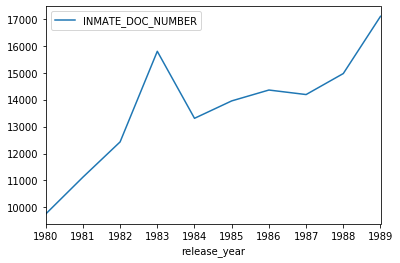

In [35]:
sent_by_year.nunique().reset_index().plot('release_year','INMATE_DOC_NUMBER')

## Using Multiple Tables

Suppose we wanted to know whether the average sentence length differed by race. To do this, we would need to group by race, then calculate the average sentence length. The `sentence` table doesn't contain information about inmate race though -- that information is in the `inmate` table. To get sentence length by race, then, we need to join the tables so that we can information from both tables. Note that in the code below, we make sure to get the difference in days using the `JulianDay` command.

As before, let's look at only the cases in the 1980s.

In [37]:
# check how many records from our inmate data matches the sentence data

qry = """
SELECT sentences.INMATE_DOC_NUMBER, inmate.INMATE_RACE_CODE, CAST(strftime("%Y",sentences.ACTUAL_SENTENCE_END_DATE) as integer) as release_year,
     CAST(JulianDay(sentences.ACTUAL_SENTENCE_END_DATE) - JulianDay(sentences."SENTENCE_BEGIN_DATE_(FOR_MAX)") as integer) as sentence_length,
      sentences."SENTENCE_BEGIN_DATE_(FOR_MAX)", sentences.ACTUAL_SENTENCE_END_DATE
FROM sentences
LEFT JOIN inmate
ON sentences.INMATE_DOC_NUMBER = inmate.INMATE_DOC_NUMBER
WHERE release_year >= 1980 AND release_year < 1990
AND INMATE_SENTENCE_COMPONENT == '001'
"""
sent_in = pd.read_sql(qry, conn)

In [38]:
sent_in.head()

,INMATE_DOC_NUMBER,INMATE_RACE_CODE,release_year,sentence_length,SENTENCE_BEGIN_DATE_(FOR_MAX),ACTUAL_SENTENCE_END_DATE
0,0000004,WHITE,1984,365,1983-07-12,1984-07-11
1,0000010,BLACK,1983,2938,1975-06-11,1983-06-27
2,0000026,WHITE,1984,419,1983-07-18,1984-09-09
3,0000031,BLACK,1981,3734,1971-08-13,1981-11-02
4,0000033,BLACK,1980,90,1979-11-06,1980-02-04


In [39]:
sent_in[['INMATE_RACE_CODE', 'sentence_length']].groupby('INMATE_RACE_CODE').agg({'sentence_length':['mean','count']})

sentence_length       
                            mean  count
INMATE_RACE_CODE                       
                      463.000000      2
ASIAN/ORTL         170383.638298     47
BLACK               35888.332355  72248
INDIAN              24411.074733   3372
OTHER              105091.892128    686
UNKNOWN            483735.333333      3
WHITE               30625.265931  63005

## Percentiles

In this section, we will calculate percentiles.

In [40]:
# what is the distribution of height in our sample?
height = inoff['OFFENDER_HEIGHT_(IN_INCHES)'].astype(float)
inoff['OFFENDER_HEIGHT_(IN_INCHES)'] = height

NameError: name 'inoff' is not defined

In [41]:
# Percentiles of height
inoff['OFFENDER_HEIGHT_(IN_INCHES)'].describe(percentiles=[0.1,0.25,0.5, 0.75, 0.9])

NameError: name 'inoff' is not defined

In [ ]:
# Percentiles of height by gender
inoff.groupby('INMATE_GENDER_CODE')['OFFENDER_HEIGHT_(IN_INCHES)'].describe(percentiles=[0.1,0.25,0.5, 0.75, 0.9])